To showcase the ``AAclust().correlation()`` method, we create an example dataset:

In [1]:
import aaanalysis as aa
import seaborn as sns
import matplotlib.pyplot as plt
aa.options["verbose"] = False
# Obtain example scale dataset 
df_scales = aa.load_scales().T.sample(100).T
df_cat = aa.load_scales(name="scales_cat")
dict_scale_name = dict(zip(df_cat["scale_id"], df_cat["subcategory"]))
names = [dict_scale_name[s] for s in list(df_scales)]
X = df_scales.T
# Fit AAclust model and retrieve labels
aac = aa.AAclust()
labels = aac.fit(X, n_clusters=10).labels_

We now use the ``AAclust().comp_correlation()`` method to compute the pairwise Pearson correlation across all scales provided as feature matrix ``X`` and sorted based on their clustering ``labels``:

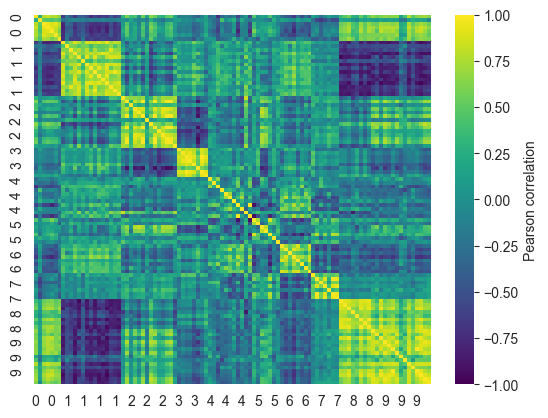

In [2]:
df_corr, labels_sorted = aac.comp_correlation(X=X, labels=labels)
# Visualize pairwise correlation by heatmap
sns.heatmap(df_corr, vmax=1, vmin=-1, cmap="viridis", cbar_kws=dict(label="Pearson correlation"))
plt.show()

The correlation between the scales and the obtained cluster centers can be computing by providing additionally their feature matrix ``X_ref`` and labels ``labels_ref``:

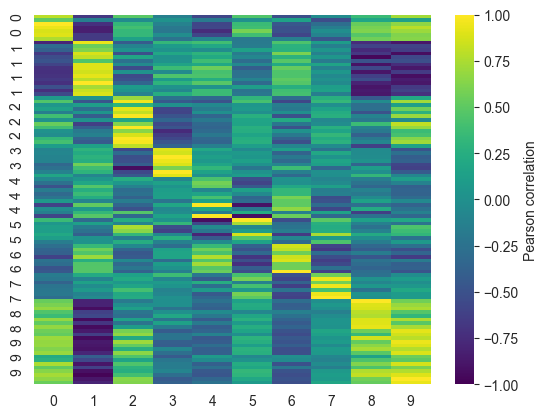

In [3]:
X_ref, labels_ref = aac.comp_medoids(X, labels=labels)
df_corr, _ = aac.comp_correlation(X=X, labels=labels, X_ref=X_ref, labels_ref=labels_ref)
# Visualize correlation between scales and cluster centers
sns.heatmap(df_corr, vmax=1, vmin=-1, cmap="viridis", cbar_kws=dict(label="Pearson correlation"))
plt.show()

List of names can be provided for all scales (from ``X``) and the reference scales using the ``names`` and ``names_ref`` parameters:  

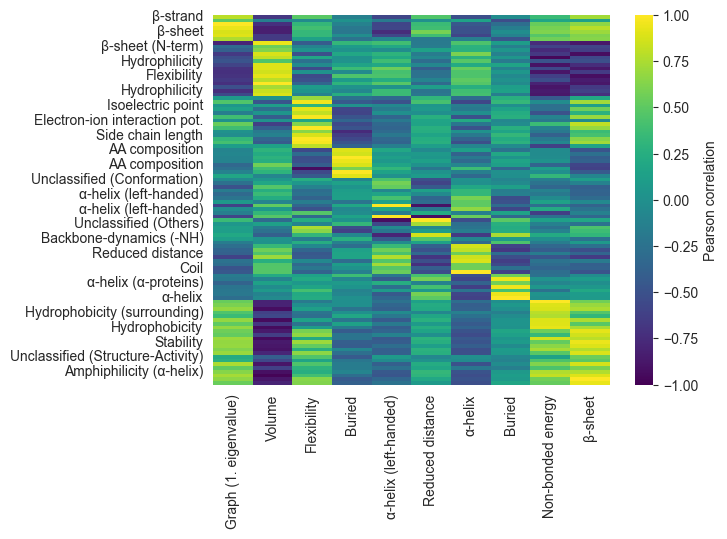

In [4]:
# Obtain names of clusters
cluster_names = aac.name_clusters(X, labels=labels, names=names, shorten_names=False)
dict_cluster = dict(zip(labels, names))
names_ref = [dict_cluster[i] for i in sorted(set(labels))]
# Creat correlation DataFrane including names
df_corr, _ = aac.comp_correlation(X=X, labels=labels, X_ref=X_ref, labels_ref=labels_ref, names=names, names_ref=names_ref)
# Visualize correlation between scales and cluster centers
sns.heatmap(df_corr, vmax=1, vmin=-1, cmap="viridis", cbar_kws=dict(label="Pearson correlation"))
plt.show()